Name: Aditi Aher

PRN: 121B1B007



**Real-Time Vehicle Detection and Feature Extraction Using ORB and ImageProcessing Techniques**

This project focuses on real-time vehicle detection in video streams using image processing techniques. It applies Gaussian filtering for noise reduction, Canny edge detection to identify car boundaries, and ORB for feature extraction to detect keypoints on vehicles.

In [ ]:
import cv2
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)


OpenCV version: 4.10.0


In [ ]:
car_cascade = cv2.CascadeClassifier('/content/cars.xml')
video_path = '/content/3727445-hd_1920_1080_30fps.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")
    exit()


**Gaussian Filtering and Convert to** **Grayscale** **bold text**

In [ ]:
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_blurred = cv2.GaussianBlur(frame, (5, 5), 0) #Gaussian Filter for noise reduction
    gray = cv2.cvtColor(frame_blurred, cv2.COLOR_BGR2GRAY)  # Convert the frame to grayscale
    frames.append(gray)

cap.release()
len(frames)

205

**Display Sample** **Frames**

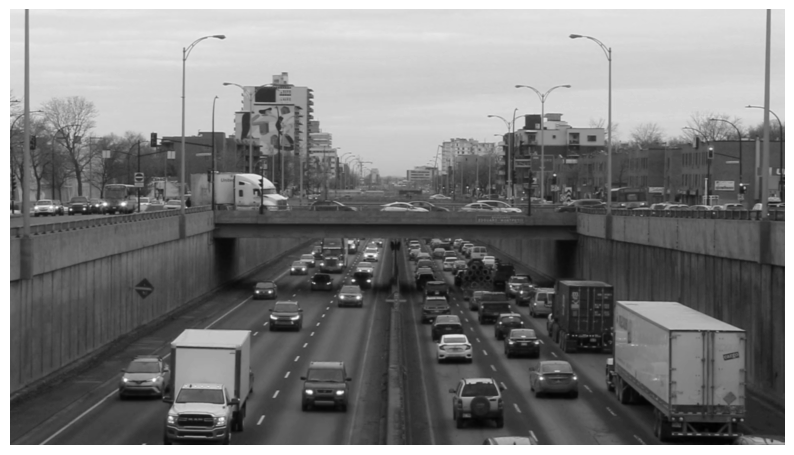

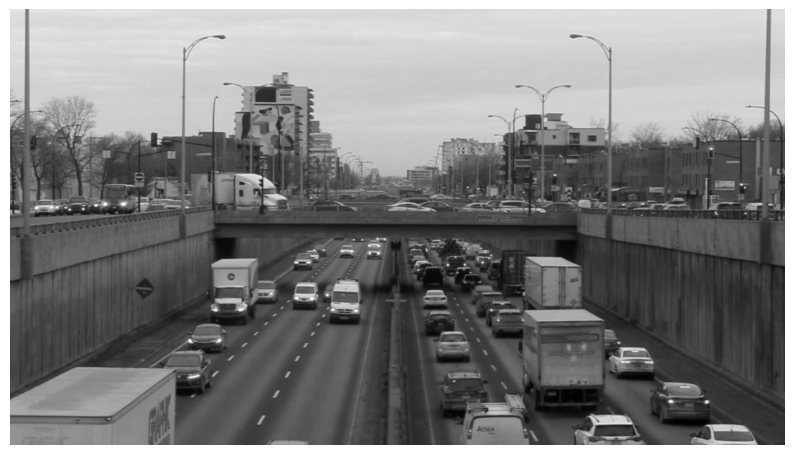

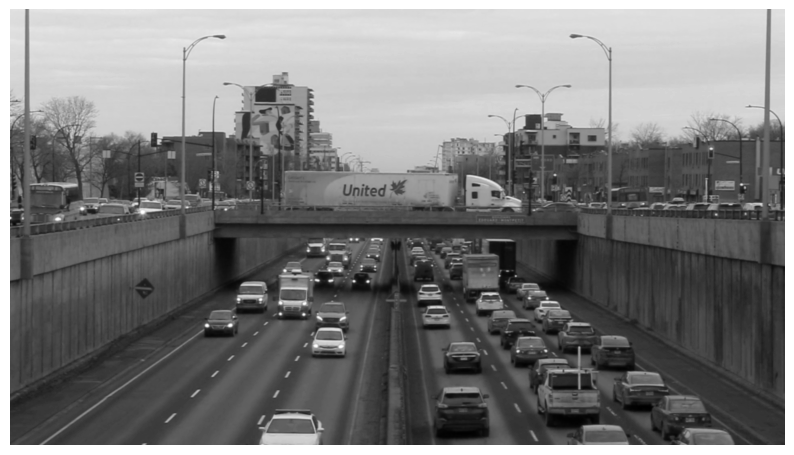

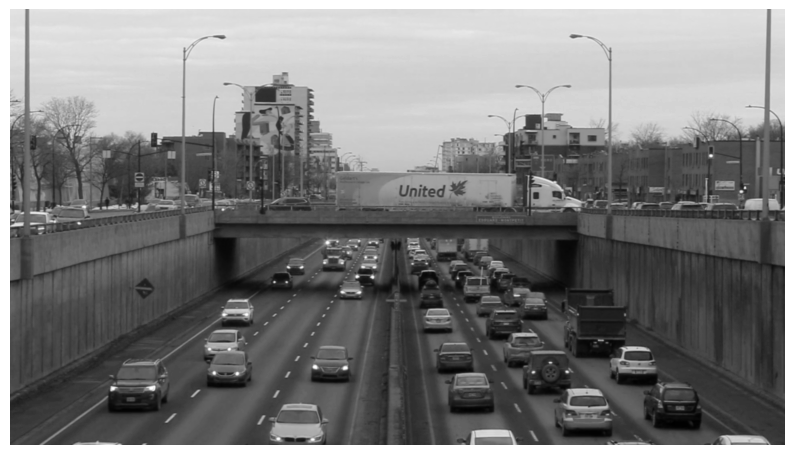

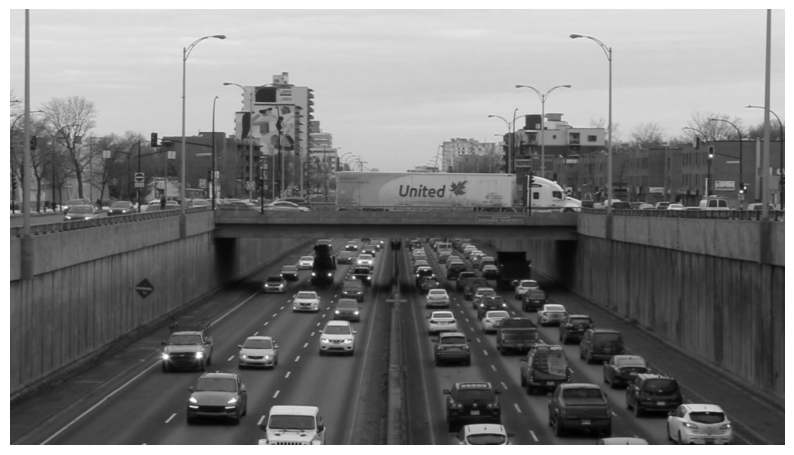

In [ ]:
for i in range(0, len(frames), len(frames) // 5):
    plt.figure(figsize=(10, 6))
    plt.imshow(frames[i], cmap='gray')
    plt.axis('off')
    plt.show()


 **Canny** **Edge** **Detection**

In [ ]:
cap = cv2.VideoCapture(video_path)
edges_list = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_blurred = cv2.GaussianBlur(frame, (5, 5), 0)
    gray = cv2.cvtColor(frame_blurred, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Canny Edge Detection
    edges_list.append(edges) # Store edges for visualization

cap.release()
len(edges_list)


205

**Display**

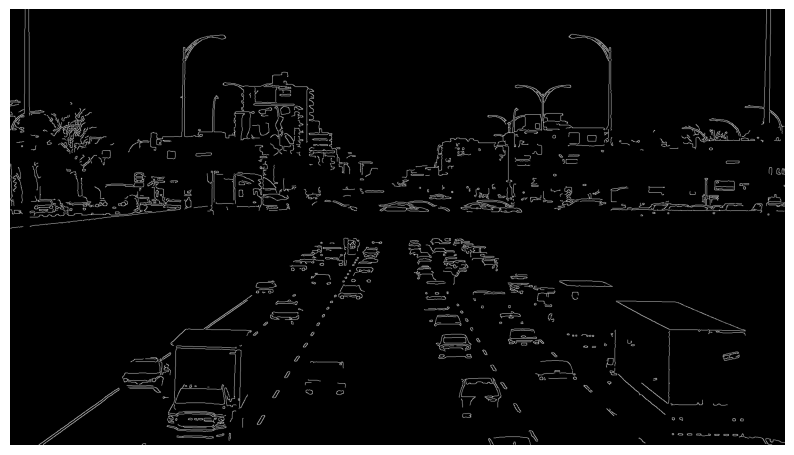

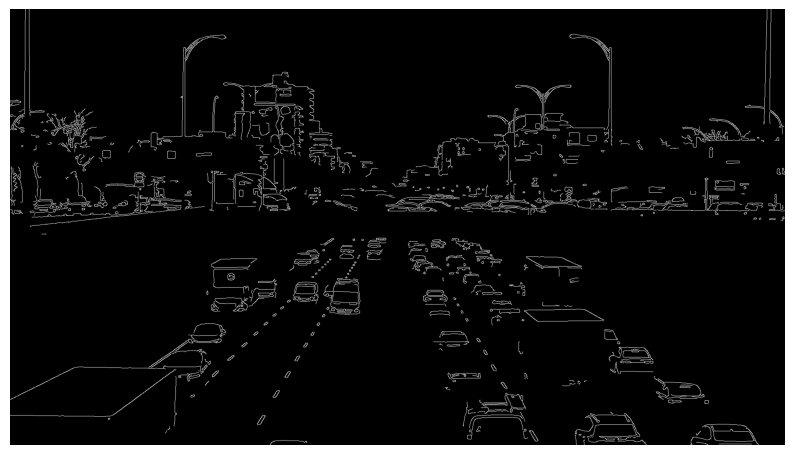

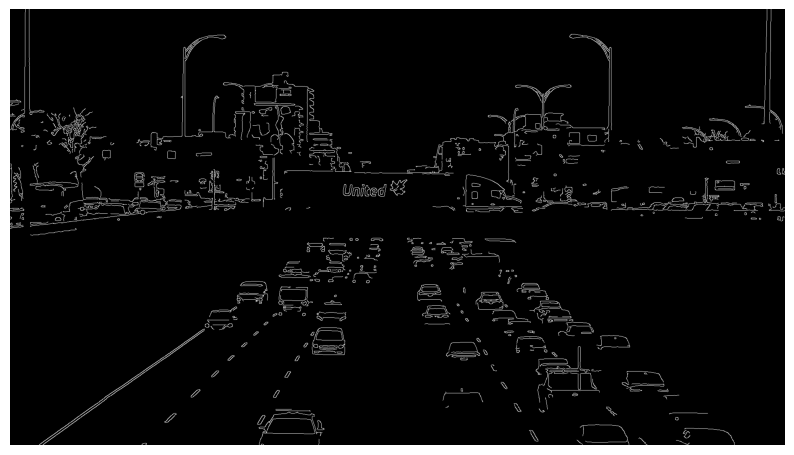

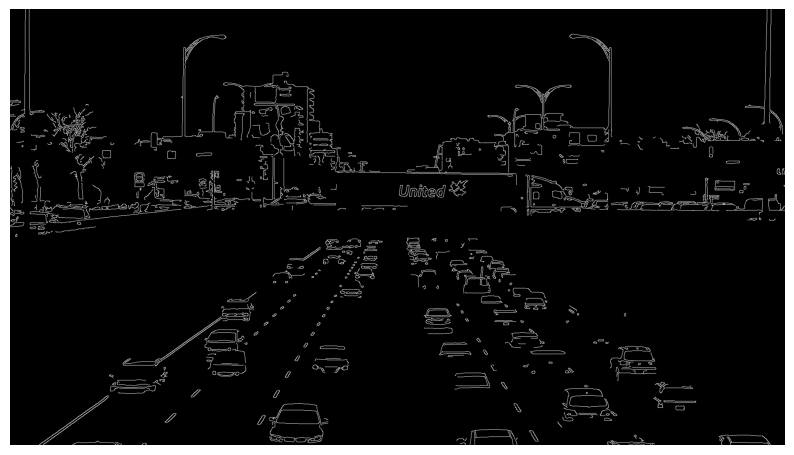

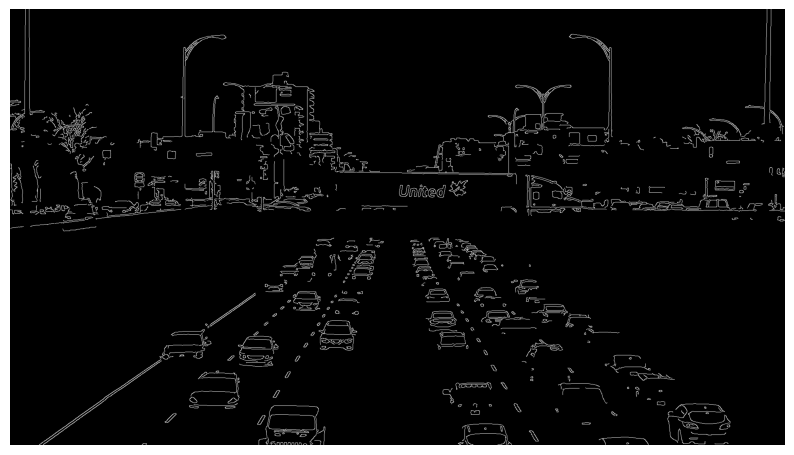

In [ ]:
# Display a few frames to see the effect of Canny edge detection
for i in range(0, len(edges_list), len(edges_list) // 5):
    plt.figure(figsize=(10, 6))
    plt.imshow(edges_list[i], cmap='gray')
    plt.axis('off')
    plt.show()


**Detect Cars and Draw Bounding Boxes**

In [ ]:
cap = cv2.VideoCapture(video_path)
bounding_box_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Convert the frame to grayscale
    cars = car_cascade.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in cars:  # Draw bounding boxes around detected cars
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #BGR image to RGB
    bounding_box_frames.append(frame_rgb)

cap.release()
len(bounding_box_frames)

205

**Display Frames with Bounding Boxes**

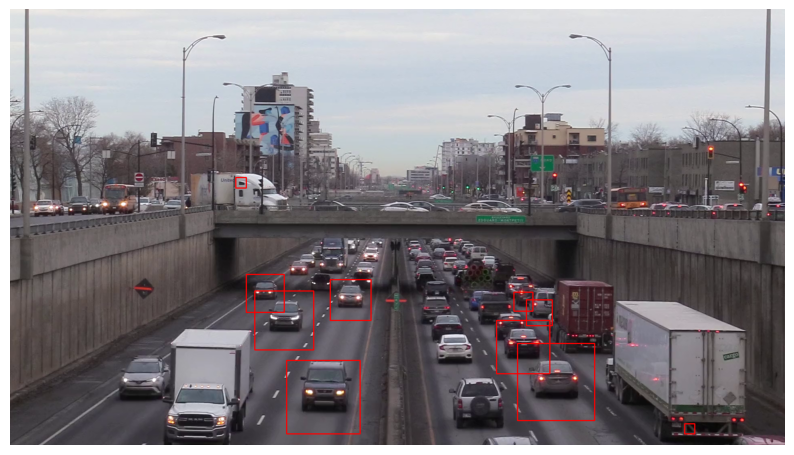

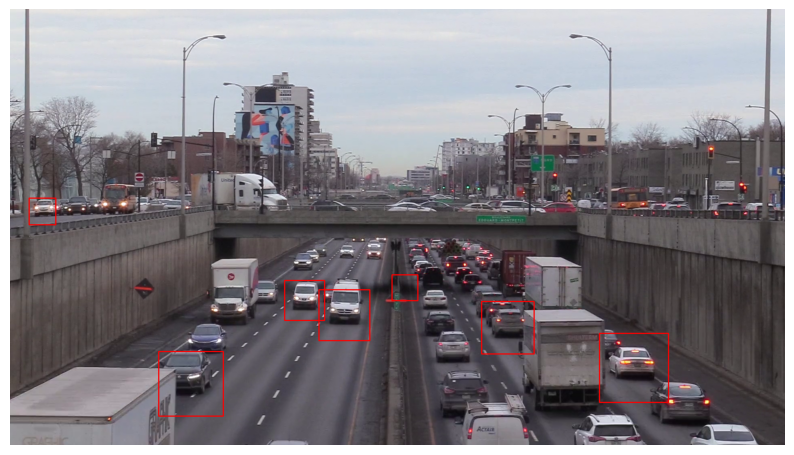

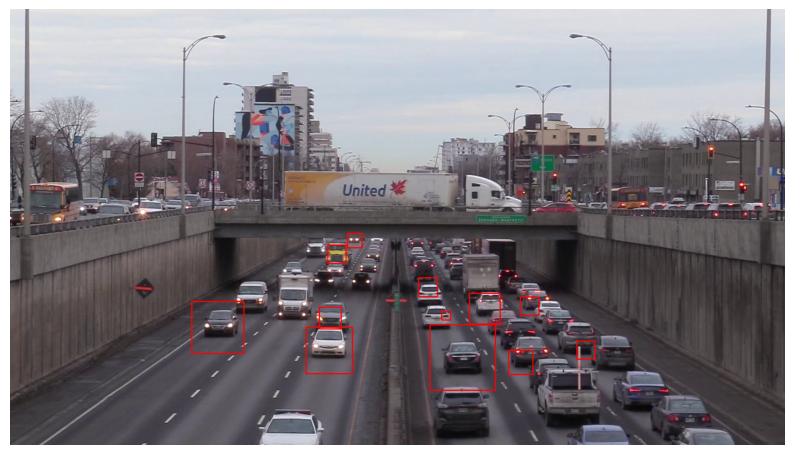

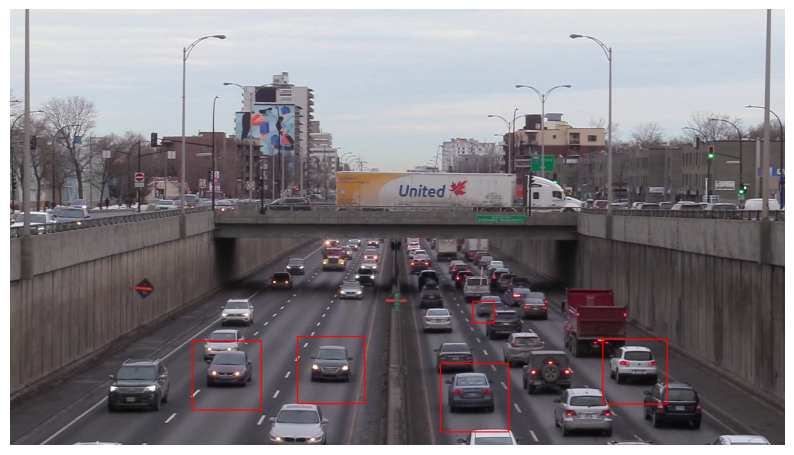

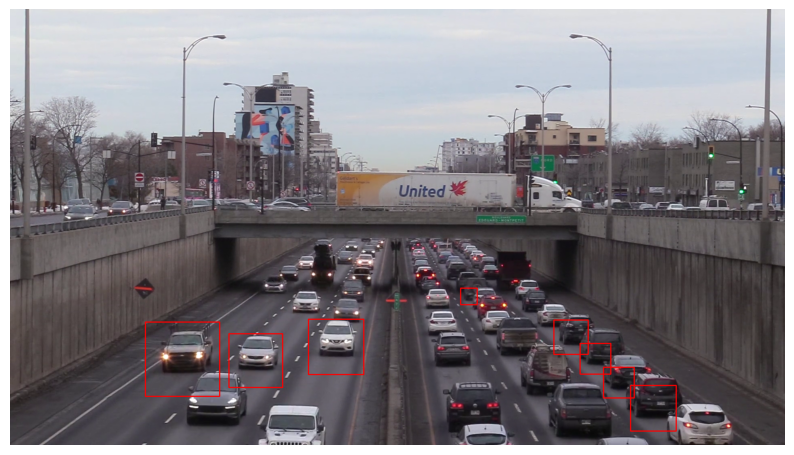

In [ ]:
for i in range(0, len(bounding_box_frames), len(bounding_box_frames) // 5):
    plt.figure(figsize=(10, 6))
    plt.imshow(bounding_box_frames[i])
    plt.axis('off')
    plt.show()


**ORB for Feature Extraction**

In [ ]:
cap = cv2.VideoCapture(video_path)

orb = cv2.ORB_create()  # Initialize ORB detector
keypoint_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break


    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = orb.detectAndCompute(gray, None) # ORB feature detection and extraction
    frame_with_keypoints = cv2.drawKeypoints(frame, keypoints, None, color=(0, 255, 0))
    frame_rgb = cv2.cvtColor(frame_with_keypoints, cv2.COLOR_BGR2RGB) #visualization
    keypoint_frames.append(frame_rgb)


cap.release()
len(keypoint_frames)

205

**Display Frames with ORB Keypoints**

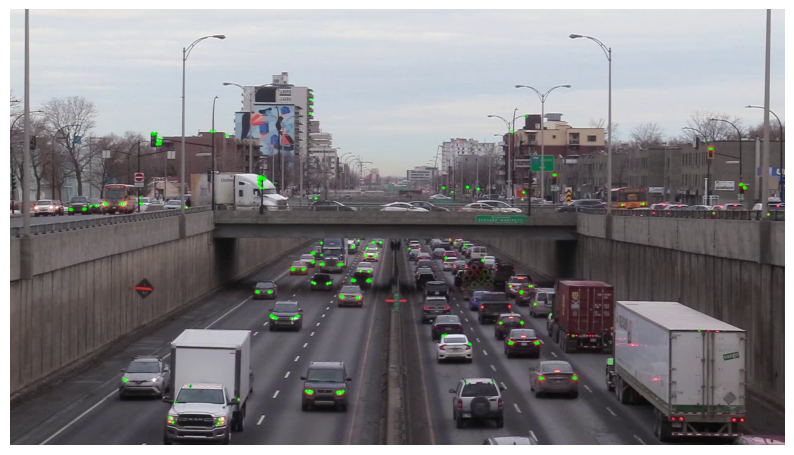

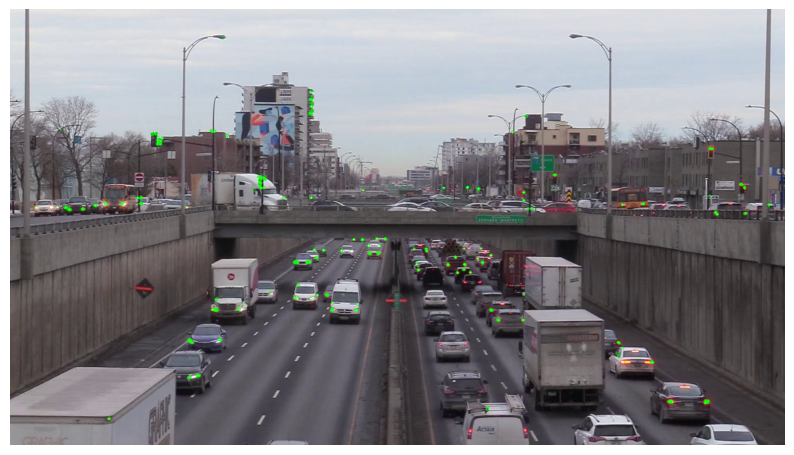

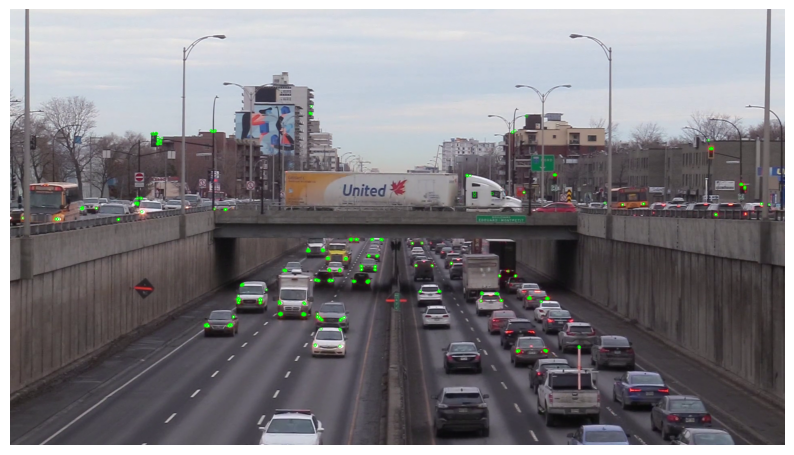

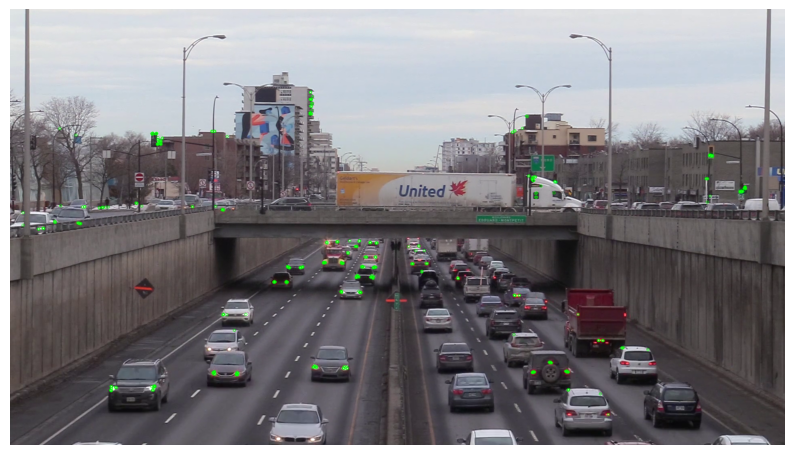

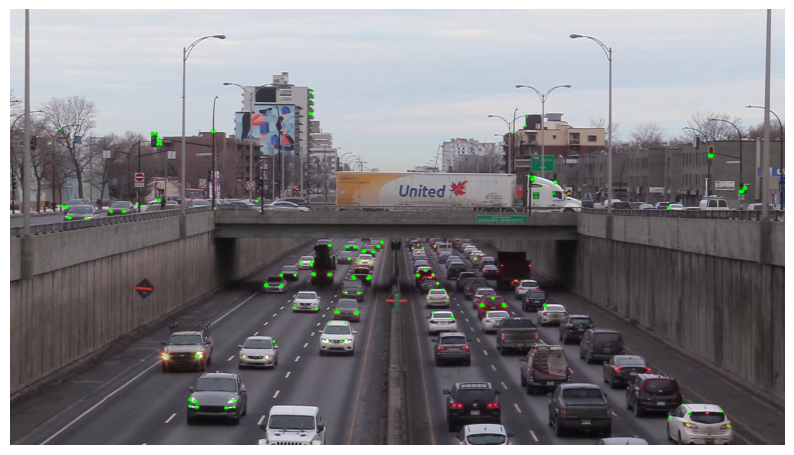

In [ ]:
for i in range(0, len(keypoint_frames), len(keypoint_frames) // 5):
    plt.figure(figsize=(10, 6))
    plt.imshow(keypoint_frames[i])
    plt.axis('off')
    plt.show()


In [ ]:
print(f"Number of keypoints detected: {len(keypoints)}")


Number of keypoints detected: 500
